# What drives the price of a car?

![](images/kurt.jpeg)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
import warnings
import math

warnings.filterwarnings('ignore')

In [2]:
#This is the Original Dataset
vehicles = pd.read_csv('data/vehicles.csv')

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [3]:
#We need to find which characterstics of a vehicle purchase coorelate most strongly to the eventual sale price of the vehicle.

In [4]:
#After the analysis we hope to be able to identify which features of a car are most important to its eventual sale price.

In [5]:
#To do this we will need to perform testing using data of previous car sales to determine how different features of the car impacted the sale

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [6]:
#Now that we have identified a dataset from KAGGLE, that aligns with our end goal, it is important to get and idea of the data contained in it.

In [7]:
#First I will look into the amount of entries in the dataset and also the types of features it contains and which data types each feature is based on.
#Our dataset has over 400,000 entries and 17 features excluding the ID column, these features are mostly categorical, but there are some numeric features as well.

In [8]:
#Next it is essential to understand how complete the data is. How much data is complete, and are any rows missing critical values or have duplicate rows
#I then examined the statistical properties of the data, this gave me a baseline to examine the statistical properties for price and odometer in particular

In [9]:
vehicles.info()
vehicles.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [10]:
vehicles.sample(10)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
4202,7307636210,mobile,34999,2019.0,ford,mustang,NaN,8 cylinders,gas,16265.0,clean,manual,NaN,rwd,sub-compact,coupe,black,al
259908,7315089264,albuquerque,8995,2013.0,nissan,rogue,NaN,NaN,gas,129766.0,clean,automatic,JN8AS5MT5DW543657,fwd,NaN,wagon,NaN,nm
228683,7315384693,missoula,18980,2016.0,kia,sorento,excellent,NaN,gas,80957.0,clean,automatic,5XYPGDA5XGG063090,4wd,NaN,NaN,NaN,mt
117600,7315119774,tampa bay area,54998,2018.0,gmc,sierra,NaN,NaN,other,134853.0,clean,automatic,1GT42YEY7JF267269,4wd,NaN,pickup,black,fl
322577,7316778354,portland,980,2019.0,ford,f-350 super duty lariat,NaN,8 cylinders,diesel,47409.0,clean,automatic,1FT8W3BT6KEF26245,4wd,NaN,truck,NaN,or
192612,7311037931,worcester / central MA,39990,2018.0,audi,s4 prestige sedan 4d,good,6 cylinders,other,33824.0,clean,other,WAUC4AF40JA016869,NaN,NaN,sedan,black,ma
111564,7316574982,south florida,4400,2004.0,toyota,sienna ce,good,4 cylinders,gas,192000.0,clean,automatic,NaN,fwd,full-size,mini-van,white,fl
286244,7303356964,north dakota,0,2006.0,dodge,grand caravan,excellent,NaN,gas,91273.0,clean,automatic,NaN,NaN,NaN,mini-van,white,nd
364017,7315885875,austin,56995,2016.0,ram,2500,NaN,NaN,other,42533.0,clean,automatic,3C6UR5FL1GG257090,4wd,NaN,pickup,white,tx
404291,7308708768,kennewick-pasco-richland,48999,2019.0,ford,f150 lariat 4x4 1/2 ton gas,NaN,NaN,gas,50495.0,clean,automatic,1FTEW1E50KKD48872,4wd,NaN,truck,white,wa


### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [11]:
# once I had a grasp of what the data entailed, I then began to prepare and clean the dataset to get it ready for modeling.
# First I made sure to drop any duplicate rows (there were none) and also set my index to be labeled 'entry'

In [12]:
#after that I removed any columns that I did not find pertinent to our end goal, this included, region, VIN, model, ID & state
#next I edited the odometer and year columns to be integers rather than floats.
#After noticing some weird prices, i filtered out all rows where the price was less than $10
#finally I filtered out any entries that had 'other' as it's answer. This is because these rows give us very little clarity towards our end goal.

In [13]:
#Lastly i made sure to remove any outliers so that our data is not skewed by entries that are outside the normal realm of results

In [14]:
#Below is the process of preparing my final dataset, this included changing date types, dropping duplicates and removing unnecessary columns
# I also ran a series of queries to remove any rows that I believe cloud the dataset. Some were ambiguous and others like vehicles that sold for $0 I did not want to include.
vehicles = vehicles.drop_duplicates()
vehicles.index.name = 'entry'
vehicles = vehicles.drop(['region','VIN','model','id','state'], axis=1)
vehicles = vehicles.dropna()
vehicles['odometer'] = vehicles['odometer'].round().astype(int)
vehicles['year'] = vehicles['year'].round().astype(int)
vehicles = vehicles.query('price >= 10')
vehicles = vehicles.query("transmission != 'other'")
vehicles = vehicles.query("fuel != 'other'")
vehicles = vehicles.query("cylinders != 'other'")
vehicles = vehicles.query("type != 'other'")
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74603 entries, 31 to 426833
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         74603 non-null  int64 
 1   year          74603 non-null  int32 
 2   manufacturer  74603 non-null  object
 3   condition     74603 non-null  object
 4   cylinders     74603 non-null  object
 5   fuel          74603 non-null  object
 6   odometer      74603 non-null  int32 
 7   title_status  74603 non-null  object
 8   transmission  74603 non-null  object
 9   drive         74603 non-null  object
 10  size          74603 non-null  object
 11  type          74603 non-null  object
 12  paint_color   74603 non-null  object
dtypes: int32(2), int64(1), object(10)
memory usage: 7.4+ MB


In [15]:
#INTERQUARTILE RANGE (IQR) - 
#To remove any outliers, below I have calculated the IQR of 'price' and used this to create new upper and lower bounds for my price column
priceq1 = vehicles['price'].quantile(0.25)
priceq3 = vehicles['price'].quantile(0.75)
priceiqr = priceq3-priceq1
lower = priceq1 - 1.5*priceiqr
upper = priceq3 +1.5*priceiqr

print(lower)
print(upper)

-13248.5
36747.5


In [16]:
#INTERQUARTILE RANGE (IQR) - 
#To remove any outliers, below I have calculated the IQR of 'odometer' and used this to create new uper and lower bounds for my odometer column
odometerq1 = vehicles['odometer'].quantile(0.25)
odometerq3 = vehicles['odometer'].quantile(0.75)
odometeriqr = odometerq3-odometerq1
lower2 = odometerq1 - 1.5*odometeriqr
upper2 = odometerq3 +1.5*odometeriqr
print(lower2)
print(upper2)

-46414.0
279314.0


In [17]:
vehicles = vehicles.query('price < 36747.5')
vehicles = vehicles.query('odometer < 279314.0')

In [18]:
#Below I have added a column to seperate manufacturers into luxury and non-luxury brands, this is done to simplify manufacturers into a single feature
luxurycars= ['bmw','mercedes-benz','lexus','cadillac','audi','acura','lincoln','infiniti','volvo','rover','jaguar','porsche','alfa-romeo','aston-martin']
vehicles['luxury']=vehicles['manufacturer'].isin(luxurycars).astype(int)
vehicles.sample(20)
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69202 entries, 31 to 426833
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         69202 non-null  int64 
 1   year          69202 non-null  int32 
 2   manufacturer  69202 non-null  object
 3   condition     69202 non-null  object
 4   cylinders     69202 non-null  object
 5   fuel          69202 non-null  object
 6   odometer      69202 non-null  int32 
 7   title_status  69202 non-null  object
 8   transmission  69202 non-null  object
 9   drive         69202 non-null  object
 10  size          69202 non-null  object
 11  type          69202 non-null  object
 12  paint_color   69202 non-null  object
 13  luxury        69202 non-null  int32 
dtypes: int32(3), int64(1), object(10)
memory usage: 7.1+ MB


In [19]:
#MY Final dataset contains 13 features- 3 numerical and 10 categorical and has 69202 total entries

In [20]:
#Finally I will prepare the dataset for cross validation by removing 25% of the rows and creating a test set with these rows

In [21]:

X = vehicles.drop('price',axis=1)
y = vehicles['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=41)
categorical = ['manufacturer','cylinders','fuel','title_status','transmission','drive','size','paint_color','type']
numerical = ['odometer']
ordinal = ['condition']
condition = [['new','like new','excellent','good','fair','salvage']]
conditionencoder = ['condition']
sizeencoder = ['size']

# Printing shapes of the sets
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('X_test:', y_test.shape,'\n')

print('X_train type:', type(X_train))
print('X_test type:', type(X_test))
print('y_train type:', type(y_train))
print('y_test type:', type(y_test))

X_train: (51901, 13)
y_train: (51901,)
X_test: (17301, 13)
X_test: (17301,) 

X_train type: <class 'pandas.core.frame.DataFrame'>
X_test type: <class 'pandas.core.frame.DataFrame'>
y_train type: <class 'pandas.core.series.Series'>
y_test type: <class 'pandas.core.series.Series'>


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

(0.0, 40000.0)

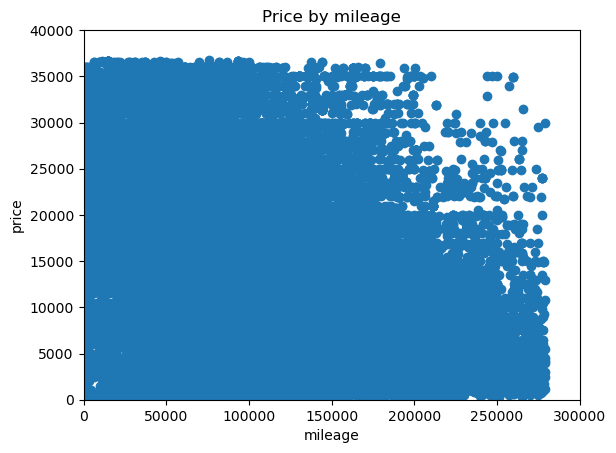

In [22]:
# THIS IS A PlOT THAT SHOWS HOW ODOMETER AND PRICE ARE RELATED, THIS WILL HELP ME DECIDE WHETHER THIS IS A LINEAR OR NONLINEAR FEATURE OF OUR MODELS. AS YOU CAN SEE IT IS DEFINITELY NON-LINEAR
plt.figure() # Create a new figure
plt.scatter(vehicles['odometer'], vehicles['price'])
plt.title('Price by mileage')
plt.xlabel('mileage')
plt.ylabel('price')
plt.xlim(0, 300000)
plt.ylim(0, 40000)

In [23]:
#Here I have created transformers to use in the models,this includes OneHot & Ordinal encoding for categorical variables and Polynomial Transformations for our odometer feature
#I ordinally encoded the 'condition' feature as the difference between each one of these categories seems to be equal
#I OneHotEncoded the rest of the Categorical Variable

polytransformer = Pipeline([
                                    ('poly',PolynomialFeatures(degree = 3,include_bias=False)),
                                    ('scale',StandardScaler())
                                ])
transform = ColumnTransformer(
                transformers = [
                                ('polynomialtransformations',polytransformer,numerical),
    ('conditionencoder', OrdinalEncoder(categories = condition),ordinal),
    ('OHE', OneHotEncoder(sparse_output=False,drop='first',handle_unknown='ignore'),categorical)],remainder = 'passthrough'
                   )

In [24]:
#STANDARD LINEAR REGRESSION MODEL
linreg = Pipeline([
    ('transform', transform),
    ('reg', LinearRegression())
    ])

linregpredictor = linreg.fit(X_train,y_train)


In [25]:
# BELOW IS A DATAFRAME WITH THE COEFFICIENTS FOR EACH FEATURE INCLUDED IN THE STANDARD LINEAR REGRESSION MODEL

coefs = linregpredictor.named_steps['reg'].coef_
classifier = linregpredictor.named_steps['reg']
coefnames = linregpredictor.named_steps['transform'].get_feature_names_out()
linregcoefs = pd.DataFrame({'features': coefnames, 'coefs': coefs})
linregcoefs['abscoefs'] = linregcoefs['coefs'].abs()
linregcoefs = linregcoefs.sort_values(by = 'abscoefs',ascending = False)
linregcoefs.head(60)

,features,coefs,abscoefs
5,OHE__manufacturer_aston-martin,13551.744642,13551.744642
12,OHE__manufacturer_datsun,9479.913005,9479.913005
43,OHE__cylinders_3 cylinders,-7797.849474,7797.849474
48,OHE__fuel_electric,-7483.807337,7483.807337
49,OHE__fuel_gas,-6185.129821,6185.129821
45,OHE__cylinders_5 cylinders,-6099.432278,6099.432278
50,OHE__fuel_hybrid,-5828.065575,5828.065575
44,OHE__cylinders_4 cylinders,-5782.541118,5782.541118
1,polynomialtransformations__odometer^2,-4771.800778,4771.800778
46,OHE__cylinders_6 cylinders,-4530.345383,4530.345383


In [26]:
#REGRESSION USING SEQUENTIAL FEATURE SELECTION
selector = SequentialFeatureSelector(LinearRegression(), n_features_to_select=10)
sequential = Pipeline([
    ('transform', transform),
    ('selector', selector),
    ('reg', LinearRegression())
    ])

seqpredictor = sequential.fit(X_train,y_train)


In [27]:
# BELOW IS A DATAFRAME WITH THE COEFFICIENTS FOR EACH FEATURE INCLUDED IN THE REGRESSION USING SEQUENTIAL FEATURE SELECTION
seqcoef = seqpredictor.named_steps['reg'].coef_
featureoutput = sequential.named_steps['transform'].get_feature_names_out(input_features=X_train.columns)
sfsfeatures = sequential.named_steps['selector'].get_support()
sfsfeaturenames = featureoutput[sfsfeatures].tolist()
seqcoefs = pd.DataFrame({'features': sfsfeaturenames, 'coefs': seqcoef})
seqcoefs['abscoefs'] = seqcoefs['coefs'].abs()
seqcoefs = seqcoefs.sort_values(by = 'abscoefs',ascending = False)
seqcoefs.head(20)

,features,coefs,abscoefs
0,polynomialtransformations__odometer,-5241.848788,5241.848788
5,OHE__fuel_gas,-5230.475135,5230.475135
8,OHE__type_truck,3872.091380,3872.091380
6,OHE__drive_fwd,-3402.073282,3402.073282
4,OHE__cylinders_8 cylinders,2441.727855,2441.727855
7,OHE__type_sedan,-2027.918539,2027.918539
3,OHE__cylinders_4 cylinders,-1802.254905,1802.254905
1,polynomialtransformations__odometer^3,1739.274263,1739.274263
2,conditionencoder__condition,-1438.230719,1438.230719
9,remainder__year,231.378279,231.378279


In [28]:
#RIDGE REGRESSION MODEL
ridgepipe = Pipeline([
    ('transform', transform),
    ('ridge', Ridge())
    ])
ridgepredictor = ridgepipe.fit(X_train,y_train)



In [29]:
#GRIDSEARCH CV TO FIND BEST ALPHA PARAMETERS FOR RIDGE MODEL
param_dict = {'ridge__alpha': [0.1, 1.0, 10.0, 100.0, 1000.0]}
grid_2 = GridSearchCV(ridgepipe, param_grid=param_dict,error_score='raise')
grid_2.fit(X_train, y_train)
train_preds = grid_2.predict(X_train)
test_preds = grid_2.predict(X_test)
model_2_best_alpha = grid_2.best_params_

In [30]:
# BELOW IS A DATAFRAME WITH THE COEFFICIENTS FOR EACH FEATURE INCLUDED IN THE RIDGE REGRESSION MODEL

ridgecoef = ridgepredictor.named_steps['ridge'].coef_
ridgeclassifier = ridgepredictor.named_steps['ridge']
ridgecoefnames = ridgepredictor.named_steps['transform'].get_feature_names_out()
ridgecoefs = pd.DataFrame({'features': coefnames, 'coefs': coefs})
ridgecoefs['abscoefs'] = ridgecoefs['coefs'].abs()
ridgecoefs = ridgecoefs.sort_values(by = 'abscoefs',ascending = False)
ridgecoefs.head(10)

,features,coefs,abscoefs
5,OHE__manufacturer_aston-martin,13551.744642,13551.744642
12,OHE__manufacturer_datsun,9479.913005,9479.913005
43,OHE__cylinders_3 cylinders,-7797.849474,7797.849474
48,OHE__fuel_electric,-7483.807337,7483.807337
49,OHE__fuel_gas,-6185.129821,6185.129821
45,OHE__cylinders_5 cylinders,-6099.432278,6099.432278
50,OHE__fuel_hybrid,-5828.065575,5828.065575
44,OHE__cylinders_4 cylinders,-5782.541118,5782.541118
1,polynomialtransformations__odometer^2,-4771.800778,4771.800778
46,OHE__cylinders_6 cylinders,-4530.345383,4530.345383


In [31]:
#LASSO REGRESSION MODEL
lassoselector = SelectFromModel(Lasso())
lasso = Pipeline([
    ('transform', transform),
    ('selector', lassoselector),
    ('reg', LinearRegression())
    ])
lassopredictor = lasso.fit(X_train,y_train)


In [32]:
# BELOW IS A DATAFRAME WITH THE COEFFICIENTS FOR EACH FEATURE INCLUDED IN THE KASSO REGRESSION
lassocoef = lassopredictor.named_steps['reg'].coef_
lassofeatureoutput = lasso.named_steps['transform'].get_feature_names_out(input_features=X_train.columns)
lassofeatures = lasso.named_steps['selector'].get_support()
lassofeaturenames = lassofeatureoutput[lassofeatures].tolist()
lassocoefs = pd.DataFrame({'features': lassofeaturenames, 'coefs': lassocoef})
lassocoefs['abscoefs'] = lassocoefs['coefs'].abs()
lassocoefs = lassocoefs.sort_values(by = 'abscoefs',ascending = False)
lassocoefs.tail(60)

,features,coefs,abscoefs
11,OHE__manufacturer_fiat,-2919.224925,2919.224925
68,OHE__type_offroad,2877.911144,2877.911144
72,OHE__type_van,2697.579993,2697.579993
16,OHE__manufacturer_jaguar,-2675.485539,2675.485539
23,OHE__manufacturer_mercury,-2518.026752,2518.026752
63,OHE__type_bus,-2516.397725,2516.397725
69,OHE__type_pickup,2464.149447,2464.149447
30,OHE__manufacturer_saturn,-2382.739811,2382.739811
38,OHE__cylinders_8 cylinders,-2371.453476,2371.453476
46,OHE__title_status_salvage,-2363.573698,2363.573698


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [33]:
#STANDARD LINEAR REGRESSION TESTING
linreg_train_pred = linregpredictor.predict(X_train)
linreg_test_pred = linregpredictor.predict(X_test)
linreg_train = mean_squared_error(y_train, linreg_train_pred)
linreg_test = mean_squared_error(y_test, linreg_test_pred)
linregrmse_test = linreg_test**0.5

print(f'MSE for training data: {linreg_train}')
print(f'MSE for test data: {linreg_test}')
print(f'RMSE for test data: {linregrmse_test}')

MSE for training data: 30026631.09767636
MSE for test data: 29953716.739637405
RMSE for test data: 5472.998879922908


In [34]:
#LINEAR REGRESSION USING SEQUENTIAL FEATURE SELECTION TESTING
seq_y_train_pred = seqpredictor.predict(X_train)
seq_y_test_pred = seqpredictor.predict(X_test)
seq_mse_train = mean_squared_error(y_train, seq_y_train_pred)
seq_mse_test = mean_squared_error(y_test, seq_y_test_pred)
seq_rmse_test = seq_mse_test**0.5

print(f'MSE for training data: {seq_mse_train}')
print(f'MSE for test data: {seq_mse_test}')
print(f'RMSE for test data: {seq_rmse_test}')

MSE for training data: 33317267.614314705
MSE for test data: 33113112.66593472
RMSE for test data: 5754.399418352425


In [35]:
#RIDGE REGRESSION TESTING 
model_2_train_mse = mean_squared_error(y_train, train_preds)
model_2_test_mse = mean_squared_error(y_test, test_preds)
model_2_best_alpha = grid_2.best_params_
ridgermse = model_2_test_mse**0.5

print(f'Train MSE: {model_2_train_mse}')
print(f'Test MSE: {model_2_test_mse}')
print(f'Test RMSE: {ridgermse}')
print(f'Best Alpha: {list(model_2_best_alpha.values())[0]}')

Train MSE: 30027881.619839177
Test MSE: 29953577.934660826
Test RMSE: 5472.986199019766
Best Alpha: 1.0


In [36]:
#LASSO MODEL TESTING
lasso_train_pred = lassopredictor.predict(X_train)
lasso_test_pred = lassopredictor.predict(X_test)
lasso_train = mean_squared_error(y_train, lasso_train_pred)
lasso_test = mean_squared_error(y_test, lasso_test_pred)
lassotestrmse = lasso_test**0.5

print(f'MSE for training data: {lasso_train}')
print(f'MSE for test data: {lasso_test}')
print(f'RMSE for test data: {lassotestrmse}')

MSE for training data: 30038346.501657136
MSE for test data: 29966574.242509354
RMSE for test data: 5474.173384403289


In [37]:
#DATAFRAME WITH ERROR FOR ALL MODELS
data = [
    ['Standard Linear Regression Model',linreg_train,linreg_test,linregrmse_test],
    ['Sequential Feature Selection Model',seq_mse_train,seq_mse_test,seq_rmse_test],
    ['Ridge Regression Model',model_2_train_mse,model_2_test_mse,ridgermse],
    ['LASSO Regression Model',lasso_train,lasso_test,lassotestrmse]
]

columns = ['Model','Train MSE','Test MSE','Test RMSE']

error = pd.DataFrame(data,columns = columns)
error

,Model,Train MSE,Test MSE,Test RMSE
0,Standard Linear Regression Model,3.002663e+07,2.995372e+07,5472.998880
1,Sequential Feature Selection Model,3.331727e+07,3.311311e+07,5754.399418
2,Ridge Regression Model,3.002788e+07,2.995358e+07,5472.986199
3,LASSO Regression Model,3.003835e+07,2.996657e+07,5474.173384


In [38]:
#After completing testing I found that the Ridge Regression and Standard Linear Regression Models produced the lowest test error 29953577.9and a Root Mean Squared Error of about 5472.99

In [39]:
# This shows that, on average, the model predicts the price of the vehicle on average about $5473 away from the actual sale price

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

In [40]:
# I have summarized my findings in the .README report that is attached to the report